# ASL DETECTION: DATA VISUALIZATION

## Overview
### This notebook visualizes the ASL Dataset and Transformations.

In [32]:
# Cell 2 (Code) - Setup and Imports
import sys
import os

# Add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.data_loader import get_data_loaders, visualize_batch, check_original_images
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [33]:
# Cell 3 (Code) - Load Data
# Load and visualize data
train_loader, val_loader = get_data_loaders()

# Print dataset sizes
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")

Number of training batches: 2175
Number of validation batches: 544


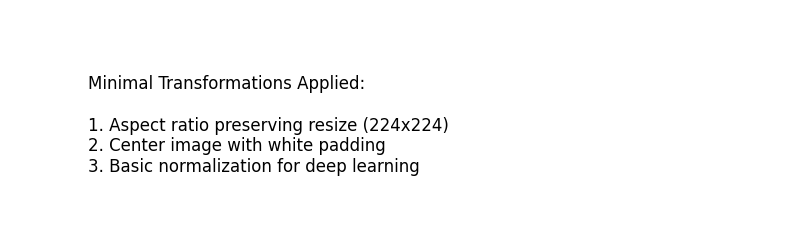

In [34]:
# Cell 4 (Code) - Compare Original vs Processed Images
def compare_processing(data_directory, dataloader, num_samples=3):
    """Compare original and minimally processed images side by side"""
    plt.figure(figsize=(15, 5*num_samples))
    
    images, labels = next(iter(dataloader))
    classes = sorted(os.listdir(data_directory))
    
    for idx in range(num_samples):
        # Original image
        cls = classes[labels[idx]]
        img_dir = os.path.join(data_directory, cls)
        orig_path = os.path.join(img_dir, os.listdir(img_dir)[0])
        
        # Plot original
        plt.subplot(num_samples, 2, 2*idx + 1)
        orig_img = plt.imread(orig_path)
        plt.imshow(orig_img)
        plt.title(f'Original Image - Class: {cls}')
        plt.axis('off')
        
        # Plot minimally processed
        plt.subplot(num_samples, 2, 2*idx + 2)
        img = images[idx].cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)
        plt.imshow(img)
        plt.title('Minimal Processing\n(Original Features Preserved)')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Show transformation description
plt.figure(figsize=(10, 3))
plt.axis('off')
plt.text(0.1, 0.5, 
         'Minimal Transformations Applied:\n\n' +
         '1. Aspect ratio preserving resize (224x224)\n' +
         '2. Center image with white padding\n' +
         '3. Basic normalization for deep learning',
         fontsize=12, verticalalignment='center')
plt.show()

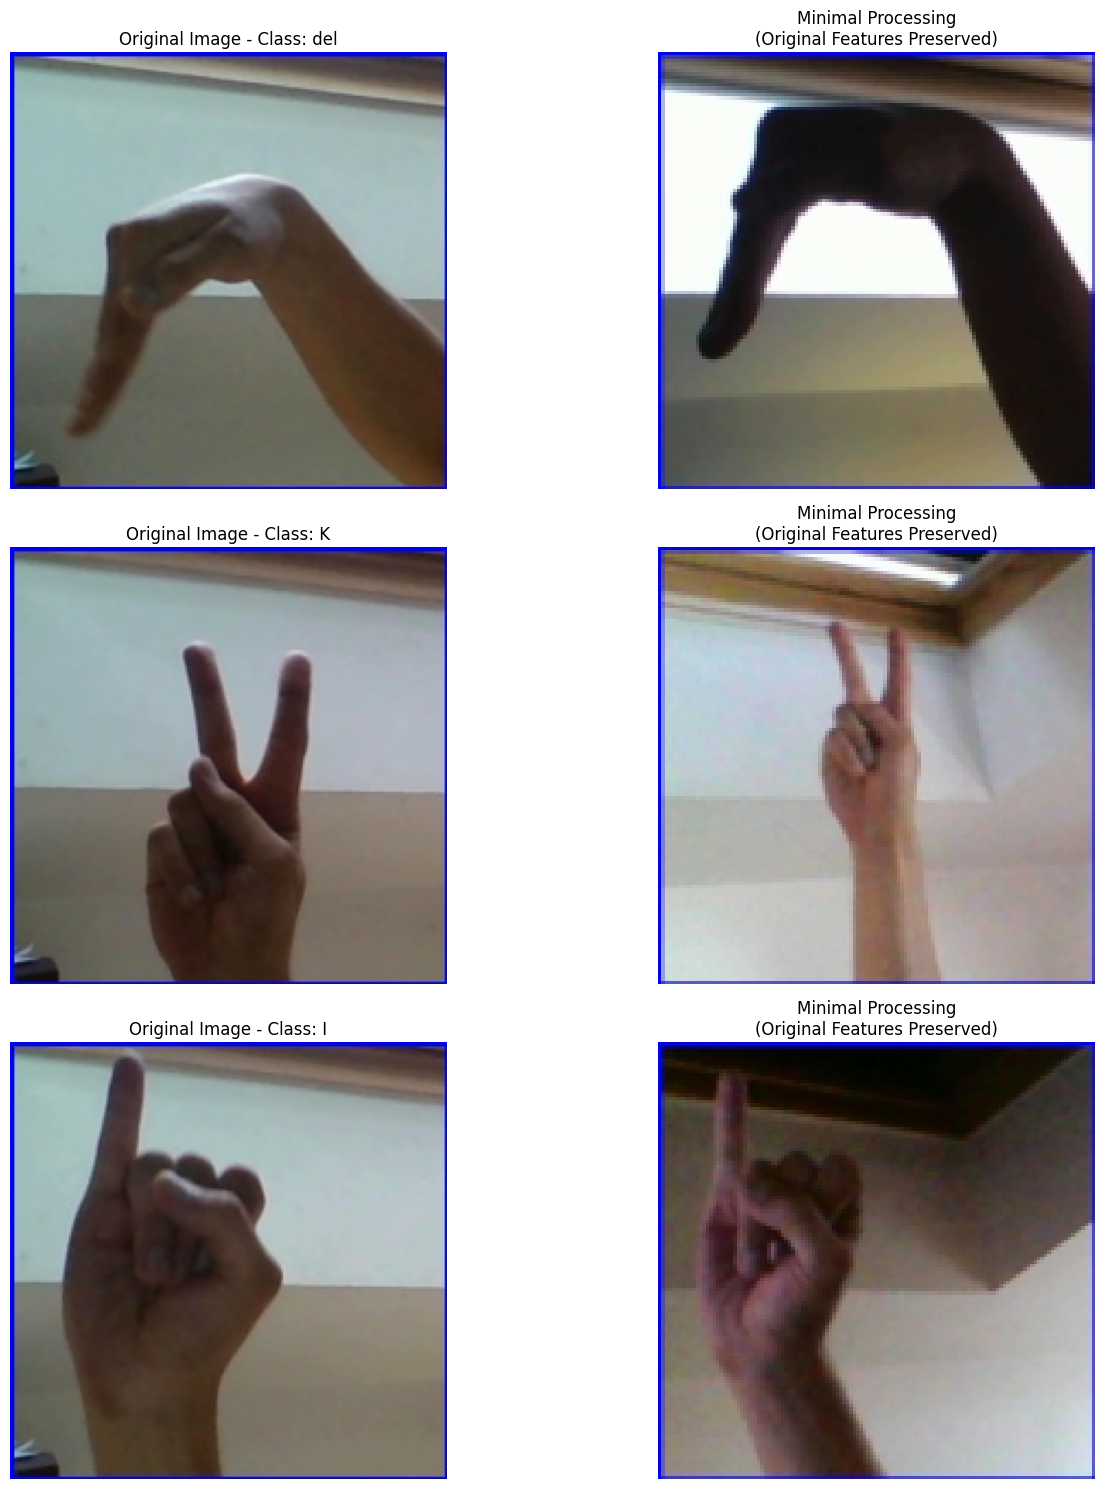

In [35]:
# Cell 5 (Code) - Compare Images
data_dir = os.path.join(project_root, 'data', 'raw', 'asl_alphabet_train')
compare_processing(data_dir, train_loader)

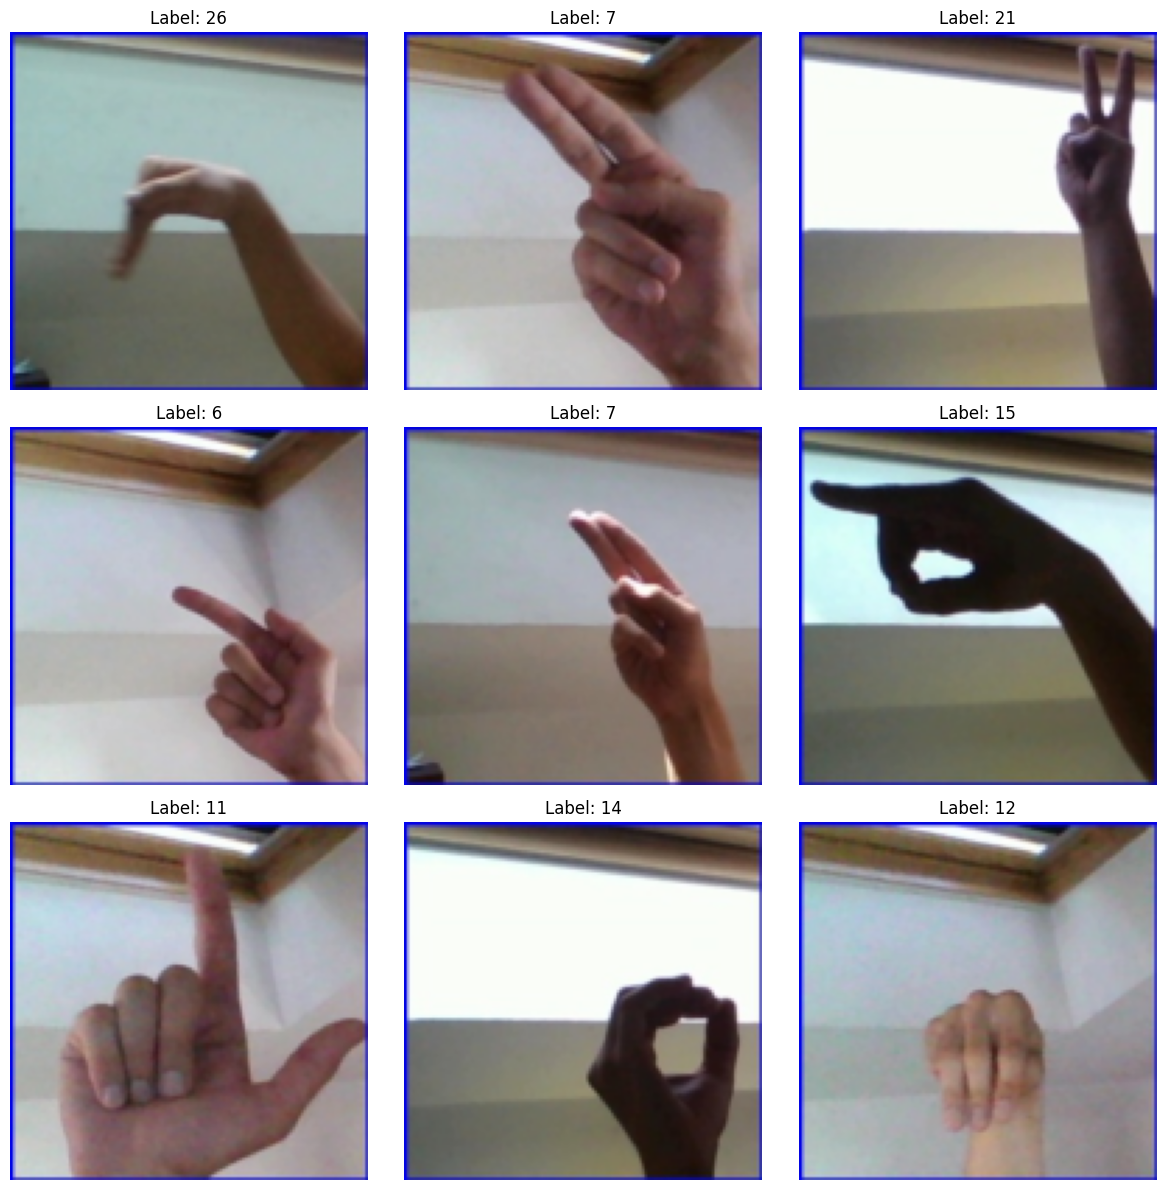

In [36]:
# Cell 6 (Code) - Visualize Batch
# Show a batch of processed images
visualize_batch(train_loader, interactive=True)